In [ ]:
if (!requireNamespace('BiocManager', quietly=TRUE))
    install.packages('BiocManager')

In [ ]:
BiocManager::install('DESeq2')

'getOption("repos")' replaces Bioconductor standard repositories, see
'?repositories' for details

replacement repositories:
    CRAN: https://cran.rstudio.com


Bioconductor version 3.14 (BiocManager 1.30.16), R 4.1.2 (2021-11-01)

Installing package(s) 'DESeq2'

also installing the dependencies ‘Biostrings’, ‘RSQLite’, ‘KEGGREST’, ‘GenomeInfoDb’, ‘XVector’, ‘DelayedArray’, ‘AnnotationDbi’, ‘annotate’, ‘S4Vectors’, ‘IRanges’, ‘GenomicRanges’, ‘SummarizedExperiment’, ‘Biobase’, ‘BiocParallel’, ‘genefilter’, ‘geneplotter’


Old packages: 'backports', 'brio', 'cpp11', 'credentials', 'devtools',
  'digest', 'fs', 'glue', 'memoise', 'openssl', 'pkgbuild', 'pkgload', 'readr',
  'remotes', 'stringi', 'vroom', 'withr', 'xml2', 'nlme'



In [ ]:
install.packages('pheatmap')

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [ ]:
library('pheatmap')
library('DESeq2')

Loading required package: S4Vectors

Loading required package: stats4

Loading required package: BiocGenerics


Attaching package: ‘BiocGenerics’


The following objects are masked from ‘package:stats’:

    IQR, mad, sd, var, xtabs


The following objects are masked from ‘package:base’:

    anyDuplicated, append, as.data.frame, basename, cbind, colnames,
    dirname, do.call, duplicated, eval, evalq, Filter, Find, get, grep,
    grepl, intersect, is.unsorted, lapply, Map, mapply, match, mget,
    order, paste, pmax, pmax.int, pmin, pmin.int, Position, rank,
    rbind, Reduce, rownames, sapply, setdiff, sort, table, tapply,
    union, unique, unsplit, which.max, which.min



Attaching package: ‘S4Vectors’


The following objects are masked from ‘package:base’:

    expand.grid, I, unname


Loading required package: IRanges

Loading required package: GenomicRanges

Loading required package: GenomeInfoDb

Loading required package: SummarizedExperiment

Loading required package: MatrixGe

In [ ]:
info   <- read.table('ALL.info', sep='\t')
counts <- as.matrix(read.csv('ALL.counts', sep='\t'))
dds    <- DESeqDataSetFromMatrix(countData=counts, colData=info, design=~condition)

Warning message in file(file, "rt"):
“cannot open file 'ALL.info': No such file or directory”


ERROR: ignored

In [ ]:
head(info)

In [ ]:
head(counts)

In [ ]:
dds$cond <- relevel(dds$cond, ref='control')
dds      <- DESeq(dds)
res      <- results(dds, alpha=0.014)


estimating size factors

estimating dispersions

gene-wise dispersion estimates

mean-dispersion relationship

final dispersion estimates

fitting model and testing



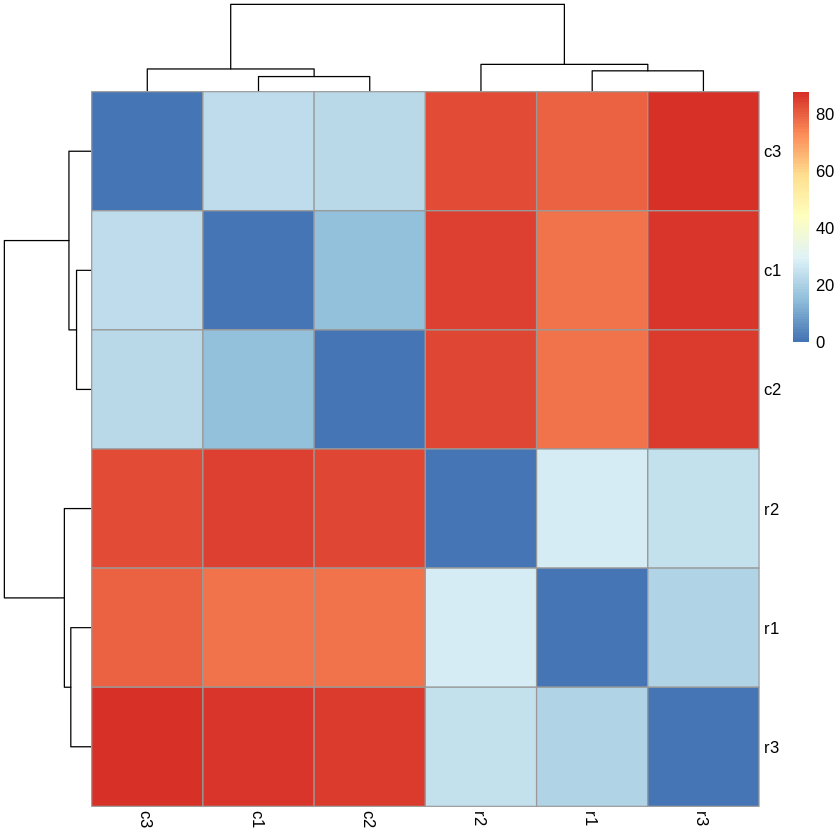

In [ ]:
rld <- rlog(dds)

dists0      <- dist(t(assay(rld)))
distMatrix0 <- as.matrix(dists0)
pheatmap(distMatrix0, clustering_distance_rows=dists0, clustering_distance_cols=dists0)

In [ ]:
sorted <- res[order(res$padj),]
res2   <- subset(sorted, padj < 0.014)
write.table(res2, 'differentially_expressed_genes.txt', sep='\t', quote=FALSE, row.names=TRUE)

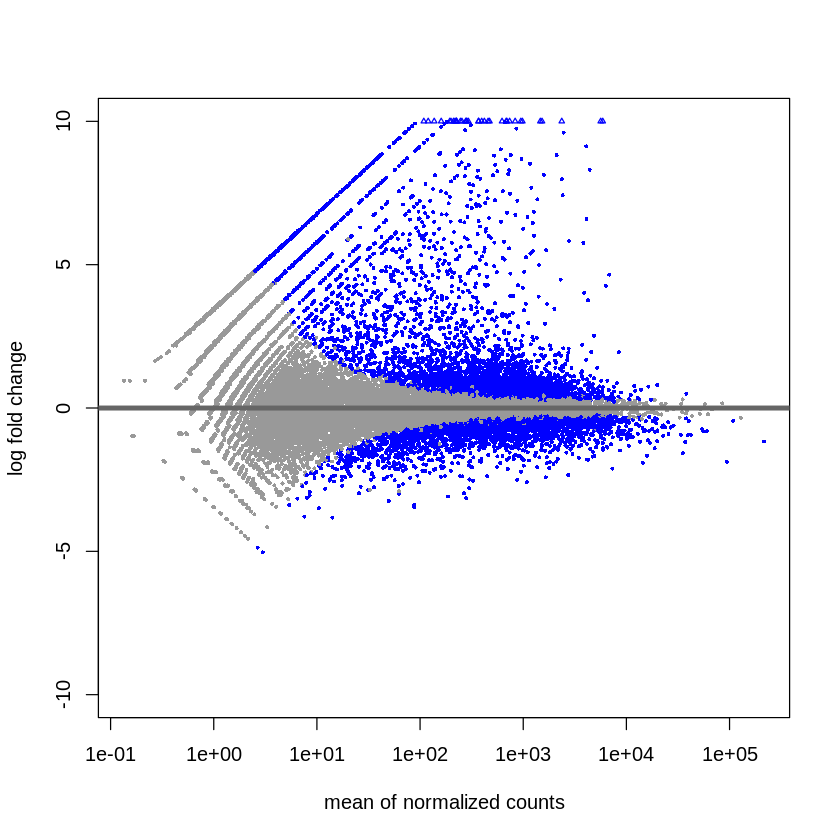

In [ ]:
plotMA(res, ylim = c(-12, 12))

log2 fold change (MLE): condition reprogramming vs control 
Wald test p-value: condition reprogramming vs control 
DataFrame with 1 row and 6 columns
                       baseMean log2FoldChange     lfcSE      stat    pvalue
                      <numeric>      <numeric> <numeric> <numeric> <numeric>
ENSMUSG00000000303.12   2782.16         5.8255  0.142999    40.738         0
                           padj
                      <numeric>
ENSMUSG00000000303.12         0

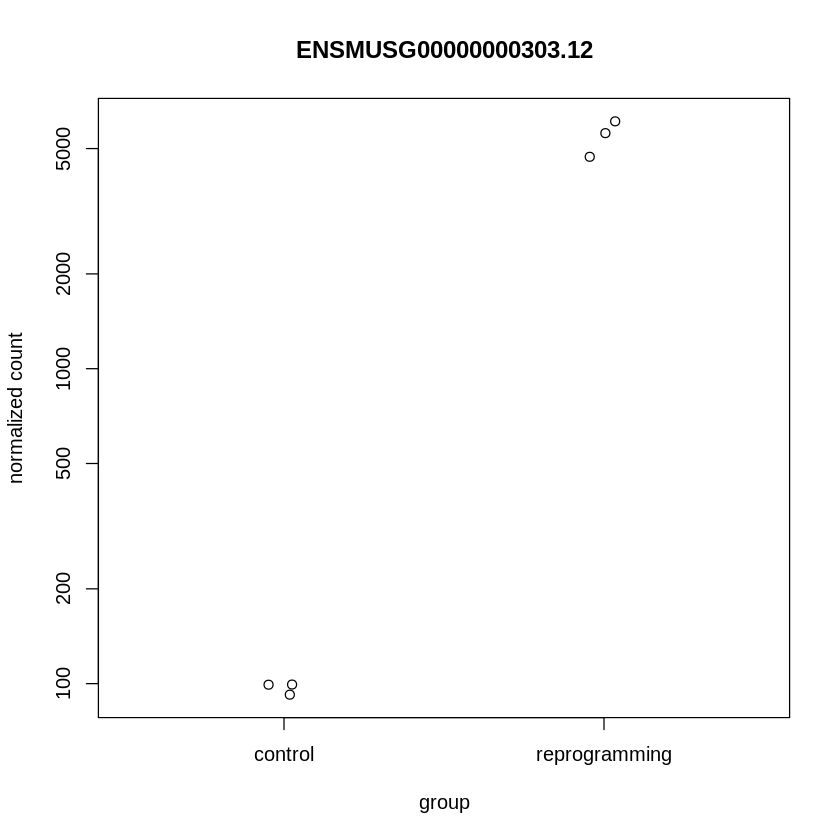

In [ ]:
res[55,]
plotCounts(dds, gene=55, intgroup='condition')

log2 fold change (MLE): condition reprogramming vs control 
Wald test p-value: condition reprogramming vs control 
DataFrame with 1 row and 6 columns
                      baseMean log2FoldChange     lfcSE      stat    pvalue
                     <numeric>      <numeric> <numeric> <numeric> <numeric>
ENSMUSG00000025608.9   4401.57        8.31225  0.197505   42.0863         0
                          padj
                     <numeric>
ENSMUSG00000025608.9         0

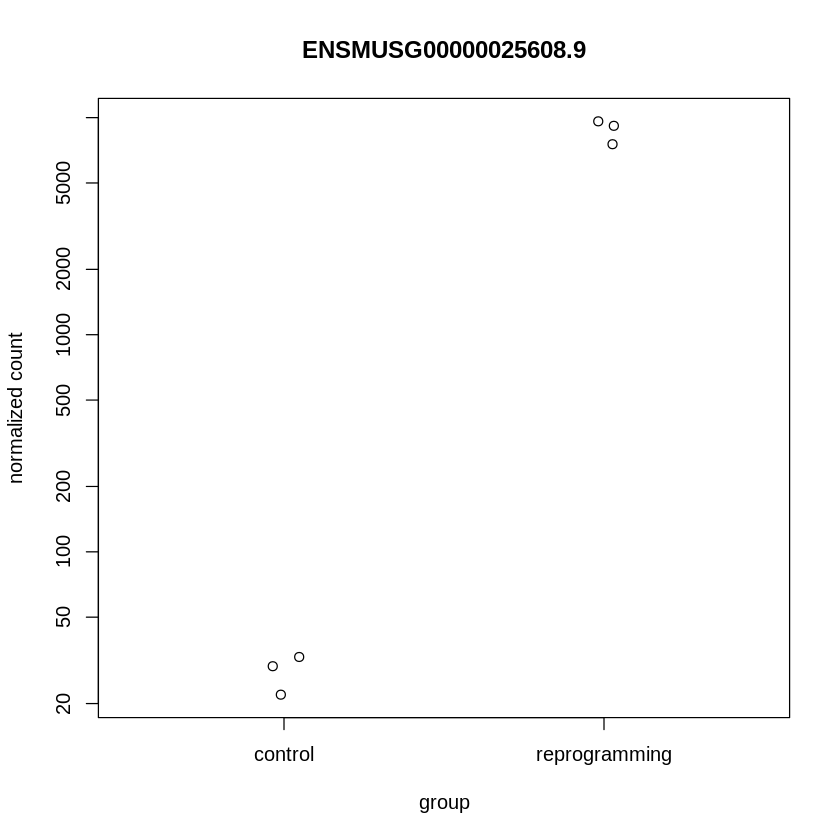

In [ ]:
res[5131,]
plotCounts(dds, gene=5131, intgroup='condition')

log2 fold change (MLE): condition reprogramming vs control 
Wald test p-value: condition reprogramming vs control 
DataFrame with 1 row and 6 columns
                      baseMean log2FoldChange     lfcSE      stat    pvalue
                     <numeric>      <numeric> <numeric> <numeric> <numeric>
ENSMUSG00000045545.8   4088.21        9.12441  0.238754   38.2167         0
                          padj
                     <numeric>
ENSMUSG00000045545.8         0

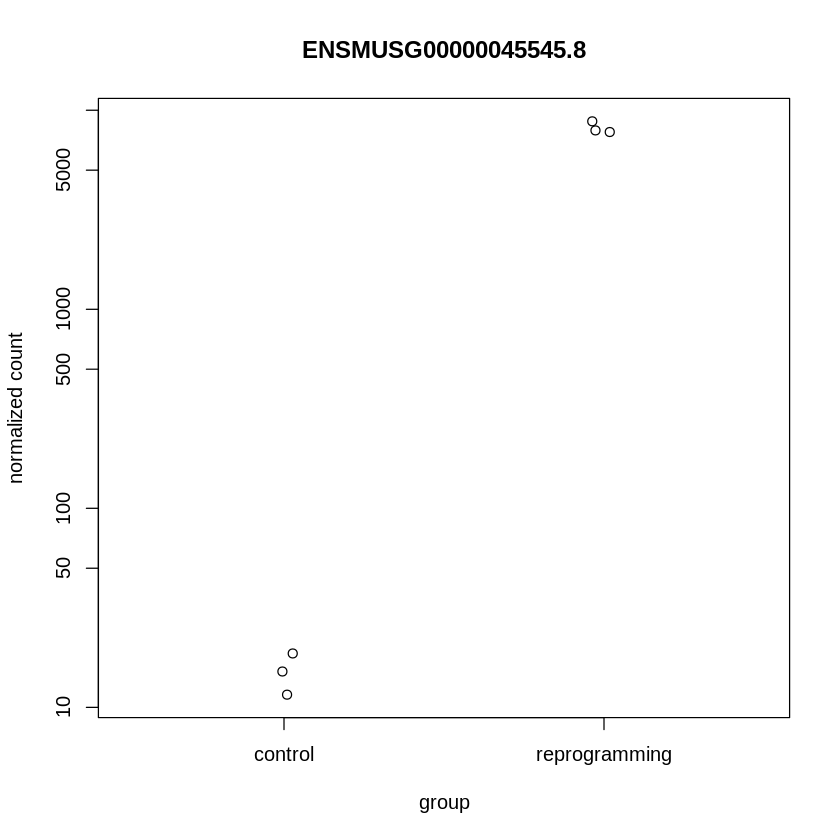

In [ ]:
res[13465,]
plotCounts(dds, gene=13465, intgroup='condition')